Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [115]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
file_path = "drug200.csv"
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "pablomgomez21/drugs-a-b-c-x-y-for-decision-trees",
  file_path,
)

In [116]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


see columns which has variation

In [117]:
cols_to_check = ['Sex', 'BP', 'Cholesterol']

for col in cols_to_check:
    count = df[col].nunique(dropna=True)
    values = df[col].dropna().unique()
    print(f"{col}: {count} categories → {values.tolist()}")

Sex: 2 categories → ['F', 'M']
BP: 3 categories → ['HIGH', 'LOW', 'NORMAL']
Cholesterol: 2 categories → ['HIGH', 'NORMAL']


determine features and target, remove target from features first

In [118]:
X = df.drop('Drug', axis =1)
y = df['Drug']

need to ENCODE few categorial columns

In [119]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for each categorical column
label_encoders = {}
X = df.drop('Drug', axis=1).copy()

for col in cols_to_check:
    if col in X.columns:
        X[col] = X[col].astype(str)  # protects against NaN
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

print("Encoded columns:", cols_to_check)
print(X.head(10))

Encoded columns: ['Sex', 'BP', 'Cholesterol']
   Age  Sex  BP  Cholesterol  Na_to_K
0   23    0   0            0   25.355
1   47    1   1            0   13.093
2   47    1   1            0   10.114
3   28    0   2            0    7.798
4   61    0   1            0   18.043
5   22    0   2            0    8.607
6   49    0   2            0   16.275
7   41    1   1            0   11.037
8   60    1   2            0   15.171
9   43    1   1            1   19.368


look for shape, it should be equal

In [120]:
print(f'Features shape:- {X.shape}')
print(f'Target Shape:- {y.shape}')

Features shape:- (200, 5)
Target Shape:- (200,)


split data

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# split (keep variable names: X_t referenced in later cell)
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_t, y_t)

# evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



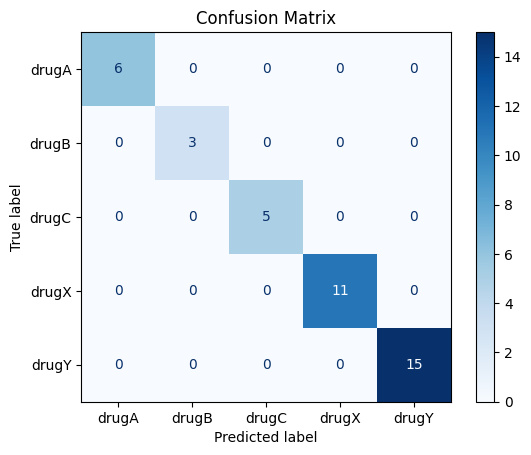

In [122]:
import matplotlib.pyplot as plt
# draw confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=model.classes_, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix")
plt.show()

prediction for new patient (unknown data)

In [123]:
new_patient = {
    "Age": 45,
    "Sex": "M",
    "BP": "NORMAL",
    "Cholesterol": "HIGH",
    "Na_to_K": 15.0
}

new_df = pd.DataFrame([new_patient])

# apply the SAME encoders

for col in cols_to_check:
    if col in new_df.columns:
         new_df[col] = label_encoders[col].transform(new_df[col].astype(str))

pred = model.predict(new_df)
print(pred[0])

drugY
